In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
import sqlite3

In [163]:
con = sqlite3.connect(r"C:\\Users\\yogar\\OneDrive\\Desktop\\Predict password strength using - NLP\\password_resources\\password_data.sqlite")


In [165]:
data = pd.read_sql_query("SELECT * FROM Users",con)


In [167]:
data.shape

(100000, 3)

In [169]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [171]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [173]:
data.drop(["index"],axis=1,inplace=True)

In [175]:
data.head(3)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1


In [177]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [179]:
data.duplicated().sum()

0

In [181]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [183]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [185]:
data.isnull().sum()

password    0
strength    0
dtype: int64

In [187]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

In [189]:
data.columns

Index(['password', 'strength'], dtype='object')

In [191]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [193]:
data['password'][0]

'zxe870819'

In [195]:
type(data['password'][0])

str

In [197]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [199]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [201]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [203]:
data[data['password'].str.isalpha()].shape


(50, 2)

In [205]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [207]:
data[data['password'].str.isalnum()].shape


(97203, 2)

In [209]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [211]:
import string

In [213]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [215]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
          return 1
        else:
          pass     

In [217]:
data["password"].apply(find_semantics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [219]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [221]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [223]:
data["password"][0]

'zxe870819'

In [225]:
len(data["password"][0])


9

In [227]:
data["length"] =  data["password"].str.len()

In [229]:
password = "Shan"

In [231]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [233]:
len([char for char in password if char.islower()])

3

In [235]:
len([char for char in password if char.islower()])/len(password)

0.75

In [237]:
def freq_lowerCase(row):
    return len([char for char in row if char.islower()])/len(row)

In [239]:
def freq_upperCase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [241]:
def freq_numericalCase(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [243]:
data["lowerCase_frequency"] = np.round(data["password"].apply(freq_lowerCase),3)
data["UpperCase_frequency"] = np.round(data["password"].apply(freq_upperCase),3)
data["NumericalCase_frequency"] = np.round(data["password"].apply(freq_numericalCase),3)

In [245]:
data.head(4)

,password,strength,length,lowerCase_frequency,UpperCase_frequency,NumericalCase_frequency
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174


In [247]:
def freq_spcialCharector(row):
    specialCharector = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
          specialCharector.append(char)
          return len(specialCharector)

In [249]:
data["SpecialCase_frequency"] = np.round(data["password"].apply(freq_spcialCharector),3)

In [251]:
data.head(4)

,password,strength,length,lowerCase_frequency,UpperCase_frequency,NumericalCase_frequency,SpecialCase_frequency
0,zxe870819,1,9,0.333,0.0,0.667,NaN
1,xw46454nr23l,1,12,0.417,0.0,0.583,NaN
2,soporte13,1,9,0.778,0.0,0.222,NaN
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1.0


In [253]:
data["SpecialCase_frequency"] = data["SpecialCase_frequency"]/data["length"]

In [255]:
data.head(4)

,password,strength,length,lowerCase_frequency,UpperCase_frequency,NumericalCase_frequency,SpecialCase_frequency
0,zxe870819,1,9,0.333,0.0,0.667,NaN
1,xw46454nr23l,1,12,0.417,0.0,0.583,NaN
2,soporte13,1,9,0.778,0.0,0.222,NaN
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [257]:
data.columns

Index(['password', 'strength', 'length', 'lowerCase_frequency',
       'UpperCase_frequency', 'NumericalCase_frequency',
       'SpecialCase_frequency'],
      dtype='object')

In [259]:
data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [261]:
cols=['length', 'lowerCase_frequency',
       'UpperCase_frequency',
       'NumericalCase_frequency', 'SpecialCase_frequency']

In [263]:
for col in cols:
  print(col)
  print(data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median']))
  print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowerCase_frequency
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


UpperCase_frequency
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


NumericalCase_frequency
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.9

In [265]:
data.columns

Index(['password', 'strength', 'length', 'lowerCase_frequency',
       'UpperCase_frequency', 'NumericalCase_frequency',
       'SpecialCase_frequency'],
      dtype='object')

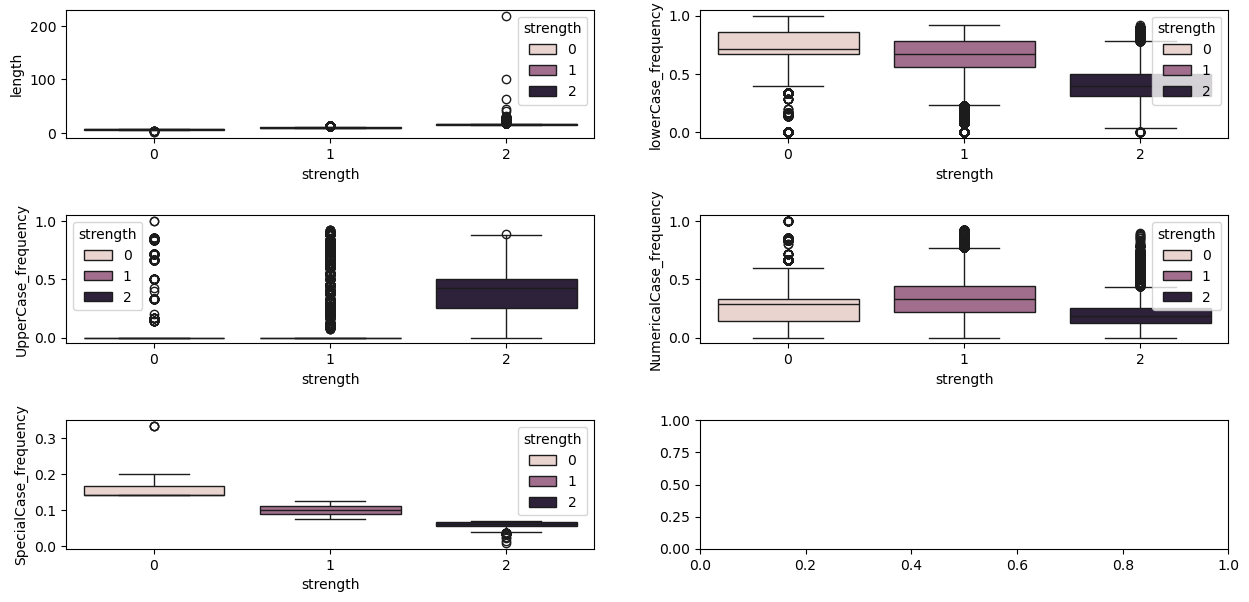

In [289]:
 fig , ((ax1,ax2),(ax3,ax4),(ax5,ax6))= plt.subplots(3,2,figsize=(15,7))
 sns.boxplot(x="strength",y="length",hue="strength",ax=ax1,data=data)
 sns.boxplot(x="strength",y="lowerCase_frequency",hue="strength",ax=ax2,data=data)
 sns.boxplot(x="strength",y="UpperCase_frequency",hue="strength",ax=ax3,data=data)
 sns.boxplot(x="strength",y="NumericalCase_frequency",hue="strength",ax=ax4,data=data)
 sns.boxplot(x="strength",y="SpecialCase_frequency",hue="strength",ax=ax5,data=data)

plt.subplots_adjust(hspace=0.6)

In [343]:
def get_dist(data,feature):

    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x="strength",y=feature,data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data["strength"]==0][feature],label=0,color="red",hist=False)
    sns.distplot(data[data["strength"]==1][feature],label=1,color="yellow",hist=False)
    sns.distplot(data[data["strength"]==2][feature],label=2,color="blue",hist=False)
    plt.legend()
    plt.show()

In [345]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

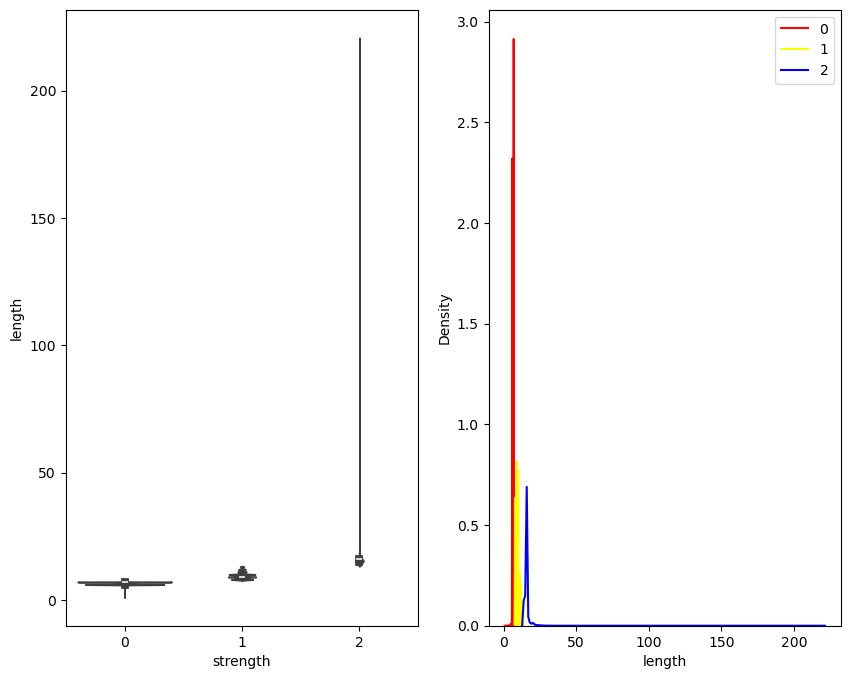

In [347]:
get_dist(data,"length")

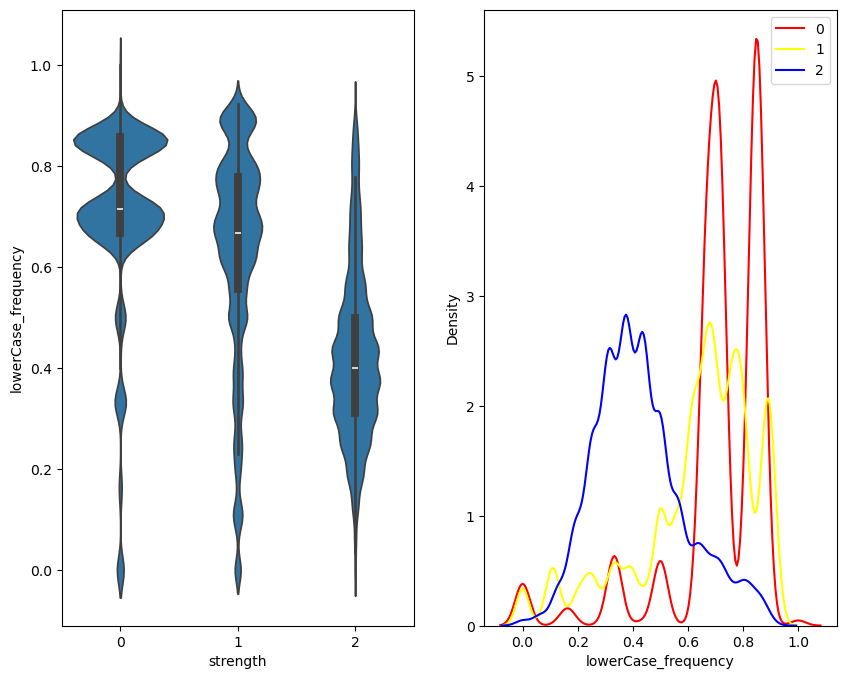

In [349]:
get_dist(data,"lowerCase_frequency")

In [350]:
data.columns

Index(['password', 'strength', 'length', 'lowerCase_frequency',
       'UpperCase_frequency', 'NumericalCase_frequency',
       'SpecialCase_frequency'],
      dtype='object')

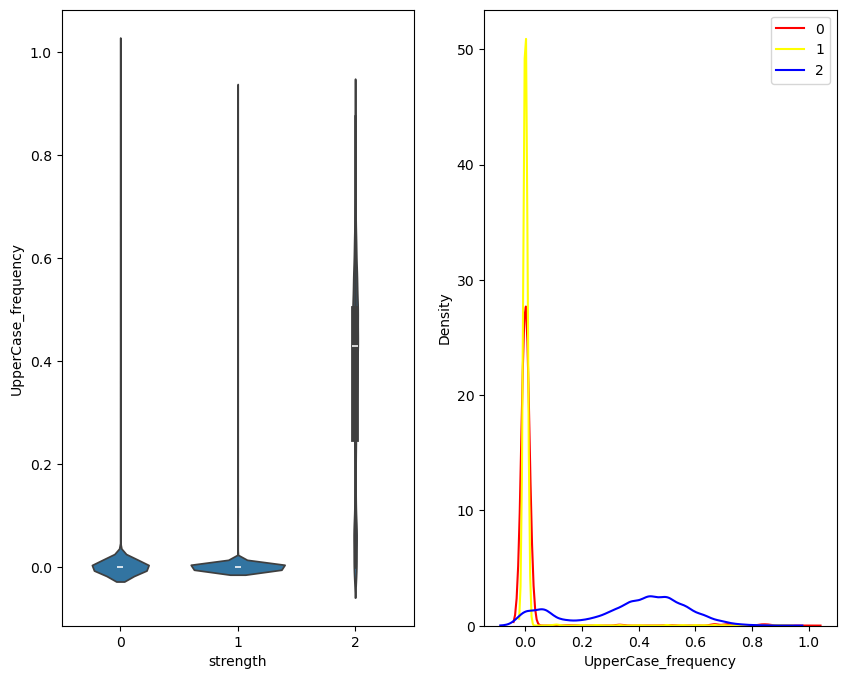

In [353]:
get_dist(data,'UpperCase_frequency')

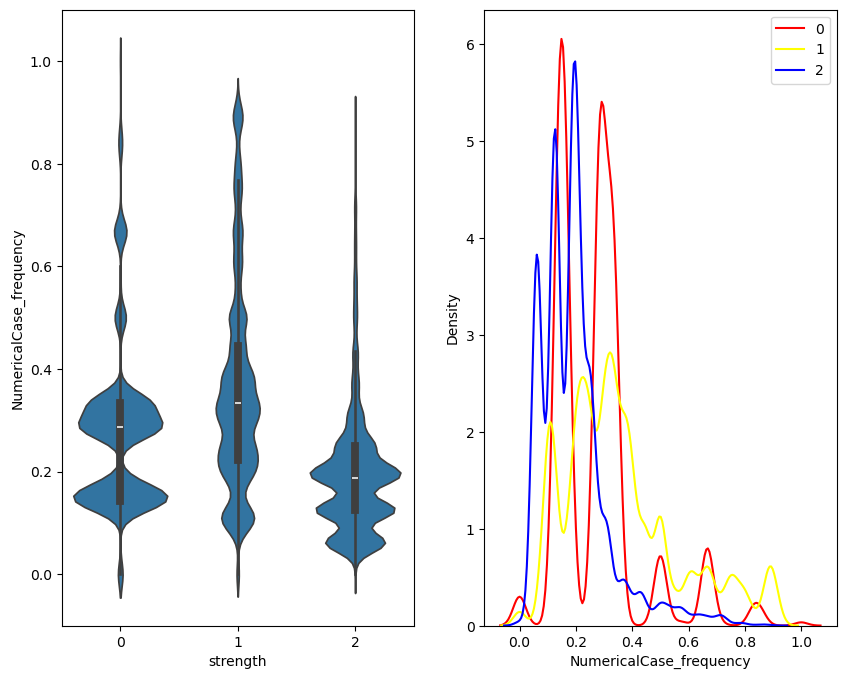

In [355]:
get_dist(data,'NumericalCase_frequency')

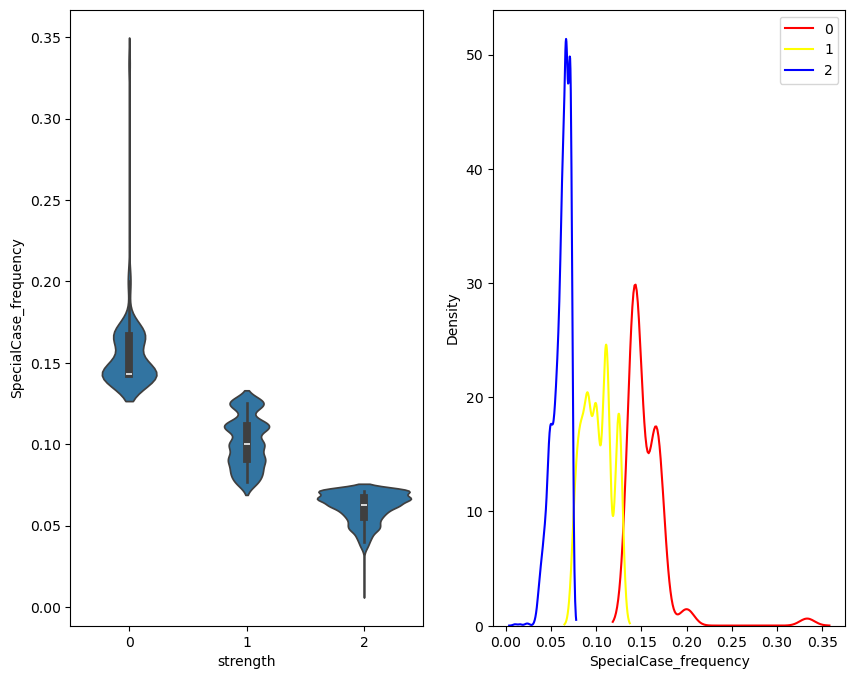

In [357]:
get_dist(data,'SpecialCase_frequency')

In [388]:
data.head(3)

,password,strength,length,lowerCase_frequency,UpperCase_frequency,NumericalCase_frequency,SpecialCase_frequency
0,zxe870819,1,9,0.333,0.0,0.667,NaN
1,xw46454nr23l,1,12,0.417,0.0,0.583,NaN
2,soporte13,1,9,0.778,0.0,0.222,NaN


In [390]:
data.sample(frac=1)

,password,strength,length,lowerCase_frequency,UpperCase_frequency,NumericalCase_frequency,SpecialCase_frequency
21150,pswd4vvb,1,8,0.875,0.000,0.125,NaN
72925,binkajp24,1,9,0.778,0.000,0.222,NaN
95747,dphgynfb21,1,10,0.800,0.000,0.200,NaN
45243,mollis6,0,7,0.857,0.000,0.143,NaN
43741,eiknakui111,1,11,0.727,0.000,0.273,NaN
...,...,...,...,...,...,...,...
38855,capivara12,1,10,0.800,0.000,0.200,NaN
59375,yamaha123456,1,12,0.500,0.000,0.500,NaN
44584,w11iz6ryne0ex,1,13,0.692,0.000,0.308,NaN
46020,MARINA007,1,9,0.000,0.667,0.333,NaN


In [392]:
dataframe = data.sample(frac=1)

In [394]:
dataframe

,password,strength,length,lowerCase_frequency,UpperCase_frequency,NumericalCase_frequency,SpecialCase_frequency
69244,szirmai1,1,8,0.875,0.0,0.125,NaN
94574,campbell4,1,9,0.889,0.0,0.111,NaN
33806,e3u35l8f,1,8,0.500,0.0,0.500,NaN
4902,azopik956,1,9,0.667,0.0,0.333,NaN
45669,testiraj.co,1,11,0.909,0.0,0.000,0.090909
...,...,...,...,...,...,...,...
11870,denver1,0,7,0.857,0.0,0.143,NaN
73347,xAWtcaDMwMQQK5xx,2,16,0.438,0.5,0.062,NaN
48685,ipate692,1,8,0.625,0.0,0.375,NaN
65815,v19008482,1,9,0.111,0.0,0.889,NaN


In [396]:
dataframe["password"]

69244            szirmai1
94574           campbell4
33806            e3u35l8f
4902            azopik956
45669         testiraj.co
               ...       
11870             denver1
73347    xAWtcaDMwMQQK5xx
48685            ipate692
65815           v19008482
94096              joe006
Name: password, Length: 100000, dtype: object

In [398]:
x = list(dataframe["password"])

In [400]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [402]:
vectorizer = TfidfVectorizer(analyzer="char")

In [404]:
 X = vectorizer.fit_transform(x)

In [406]:
X.shape

(100000, 99)

In [412]:
dataframe["password"].shape

(100000,)

In [420]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [422]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [424]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25424503, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.24484709, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.5944482 , 0.        , 0.        , 0.        , 0.33837779,
       0.        , 0.        , 0.        , 0.        , 0.32615267,
       0.33358428, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.43576043, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [428]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [430]:
len(vectorizer.get_feature_names_out())

99

In [434]:
df2 = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [436]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [440]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowerCase_frequency',
       'UpperCase_frequency', 'NumericalCase_frequency',
       'SpecialCase_frequency'],
      dtype='object')

In [442]:
df2["length"] = dataframe["length"]

In [444]:
df2["lowerCase_frequency"] = dataframe["lowerCase_frequency"]

In [446]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowerCase_frequency
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [448]:
y = dataframe["strength"]

In [450]:
from sklearn.model_selection import train_test_split

In [454]:
x_train,x_test,y_train,y_test = train_test_split(df2,y,test_size=0.2)

In [456]:
x_train.shape

(80000, 101)

In [458]:
y_train.shape

(80000,)

In [470]:
from sklearn.linear_model import LogisticRegression

In [476]:
clf = LogisticRegression(multi_class="multinomial")

In [478]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [480]:
y_pred = clf.predict(x_test)

In [482]:
y_pred

array([1, 1, 2, ..., 2, 1, 1], dtype=int64)

In [492]:
from collections import Counter

In [494]:
Counter(y_pred)

Counter({1: 16691, 2: 1832, 0: 1477})

In [505]:
password ="%@123abcd"

In [507]:
sample_array = np.array([password])

In [509]:
sample_matrix = vectorizer.transform(sample_array)

In [511]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [514]:
sample_matrix.toarray().shape

(1, 99)

In [516]:
password

'%@123abcd'

In [518]:
len(password)

9

In [526]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [528]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [530]:
np.append(sample_matrix.toarray(),(9,0.4444444444444444))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71897928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48741481, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
       0.20807263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [532]:
np.append(sample_matrix.toarray(),(9,0.4444444444444444)).shape

(101,)

In [534]:
np.append(sample_matrix.toarray(),(9,0.4444444444444444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [536]:
np.append(sample_matrix.toarray(),(9,0.4444444444444444)).reshape(1,101).shape

(1, 101)

In [544]:
new_matrix = np.append(sample_matrix.toarray(),(9,0.4444444444444444)).reshape(1,101)

In [546]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [550]:
def predict():
    password = input("Enter a password:")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)

    length_pass = len(password)
    length_normalized_lowercase = len([char for char in password if char.islower()])/len(password)

    np.append(sample_matrix.toarray(),(length_pass,length_normalized_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix)
    
    if result == 0:
        return "password is weak"
    elif result == 1:
        return "password is normal"
    else:
        return "password is strong"

In [552]:
predict()

Enter a password: sujeevan


'password is weak'

In [554]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [556]:
accuracy_score(y_test,y_pred)

0.80425

In [558]:
confusion_matrix(y_test,y_pred)

array([[  794,  1952,     0],
       [  598, 13797,   338],
       [   85,   942,  1494]], dtype=int64)

In [560]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.29      0.38      2746
           1       0.83      0.94      0.88     14733
           2       0.82      0.59      0.69      2521

    accuracy                           0.80     20000
   macro avg       0.73      0.61      0.65     20000
weighted avg       0.79      0.80      0.79     20000

